In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import Perceptron
from mpl_toolkits.mplot3d import Axes3D
import time

$\textbf{1.}$

a. Points above the line: 43, below the line: 57
b. Slope of the line: 0.6088093781462695
c. Intercept: [-1.44571869]


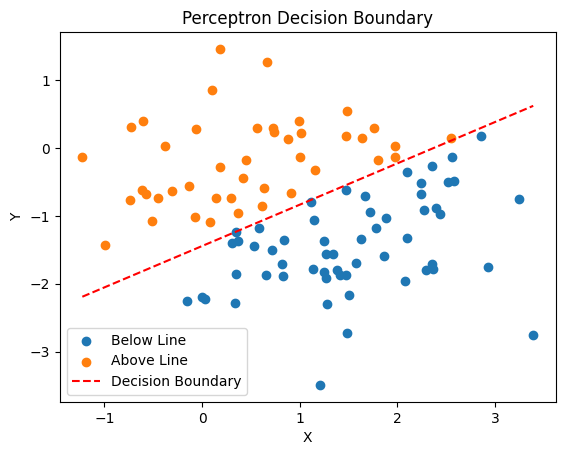

In [35]:
#load data
adata = loadmat('training_and_testing_values.mat')

#extract training data
x_training = adata['x_training']
y_training = adata['y_training']
correct_answer = adata['correct_answer'].ravel()

#extract testing data
x_testing = adata['x_testing']
y_testing = adata['y_testing']

#create perceptron model
perceptron_model = Perceptron()

#train the perceptron model
perceptron_model.fit(np.column_stack((x_training, y_training)), correct_answer)

#make predictions on the testing data
predictions = perceptron_model.predict(np.column_stack((x_testing, y_testing)))

#count the number of points above and below the line
above_line = np.sum(predictions == 1)
below_line = np.sum(predictions == 0)
print(f"a. Points above the line: {above_line}, below the line: {below_line}")

#extract the slope of the line
slope = -perceptron_model.coef_[0][0] / perceptron_model.coef_[0][1]
print(f"b. Slope of the line: {slope}")

#extract the intercept
intercept = -perceptron_model.intercept_ / perceptron_model.coef_[0][1]
print(f"c. Intercept: {intercept}")

#plotting
fig, ax = plt.subplots()

#scatter plot for testing data points
ax.scatter(x_testing[predictions == 0], y_testing[predictions == 0], label='Below Line')
ax.scatter(x_testing[predictions == 1], y_testing[predictions == 1], label='Above Line')

#plot the decision boundary
x_decision = np.linspace(x_testing.min(), x_testing.max(), 100)
y_decision = slope * x_decision + intercept
ax.plot(x_decision, y_decision, color='red', linestyle='--', label='Decision Boundary')

#set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Perceptron Decision Boundary')

#create a legend
ax.legend()

#show the plot
plt.show()


This graph above displays the decision boundary of this perceptron and the points below/above the decision boundary. The decision boundary is determined by the weights and the biases learned during the training process. Looking closely, it looks like our classifer is working quite well. Dots that are or mostly are below the line are classified as below the boundary, while dots above the line are classified as above the boundary. 

$\textbf{2.}$

In [38]:
data = loadmat('testing_and_training_values_3.mat')

# Training data
training = data['training']
X_train = training[:, :3]
y_train = training[:, 3]

# Testing data
testing = data['testing']
X_test = testing

#perceptron function
def perceptron_train(X, y, learning_rate=0.1, epochs=1000):
    X_bias = np.column_stack((np.ones(X.shape[0]), X))
    weights = np.full(X_bias.shape[1], 0.5)
    for epoch in range(epochs):
        predictions = np.heaviside(np.dot(X_bias, weights), 0)
        weights += learning_rate * np.dot((y - predictions), X_bias)
    return weights

#train perceptron 
weights = perceptron_train(X_train, y_train)
X_test_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))
predictions = np.heaviside(np.dot(X_test_bias, weights), 0)
above_plane = np.sum(predictions == 1)
below_plane = np.sum(predictions == 0)
print(f"a. Points above the plane: {above_plane}, Points below the plane: {below_plane}")

a, b, c = weights[1:4]
d = weights[0]
print(f"b. Plane Equation: {a:.2f}x + {b:.2f}y + {c:.2f}z = {d:.2f}")

a. Points above the plane: 341, Points below the plane: 659
b. Plane Equation: -20.65x + 41.22y + 10.39z = -20.50


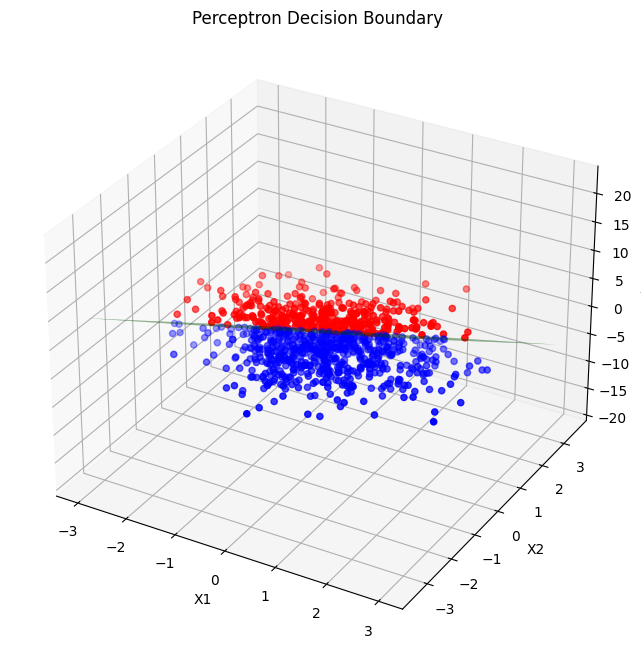

In [37]:
#prepare test data for plotting
X1, X2, X3 = X_test[:, 0], X_test[:, 1], X_test[:, 2]
X_test_bias = np.column_stack((np.ones(X_test.shape[0]), X_test))

#predictions
predictions = np.heaviside(np.dot(X_test_bias, weights), 0)

#plot it
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1[predictions == 0], X2[predictions == 0], X3[predictions == 0], color='blue', label='Below Plane')
ax.scatter(X1[predictions == 1], X2[predictions == 1], X3[predictions == 1], color='red', label='Above Plane')
#make the decision boundary
xx, yy = np.meshgrid(np.linspace(X1.min(), X1.max(), 10), np.linspace(X2.min(), X2.max(), 10))
zz = (-weights[0] - weights[1] * xx - weights[2] * yy) / weights[3]
#plot the decision boundary
ax.plot_surface(xx, yy, zz, color='green', alpha=0.5, label='Decision Boundary')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.set_title('Perceptron Decision Boundary')
plt.show()

This is a 3D perceptron - the decision boundary is a plane that divides between the two classes (above or below the plane). 